In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.pyplot import rcParams
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import tree

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')

In [4]:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
quantitative

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [5]:
data['Date'] = pd.to_datetime(data['Formatted Date'],utc= True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CC3F73AD60>,
      dtype=object)

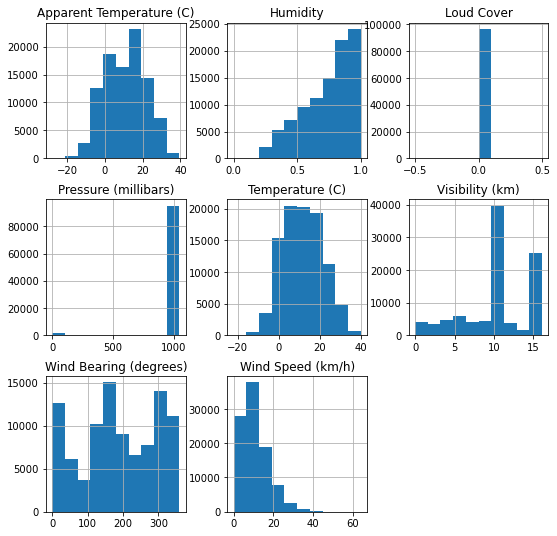

In [6]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

In [7]:
data=data.drop('Loud Cover',axis=1)
data=data.drop(data[categorical],axis=1)

In [8]:
data
data.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Date                        0
year                        0
month                       0
day                         0
hour                        0
dtype: int64

In [9]:
y = data["Temperature (C)"].values
data = data.drop(["Temperature (C)","Apparent Temperature (C)","Date"],axis=1)
X = data.values

In [17]:
print(X)
print(len(X[0]))

[[  0.89    14.1197 251.     ...   3.      31.      22.    ]
 [  0.86    14.2646 259.     ...   3.      31.      23.    ]
 [  0.89     3.9284 204.     ...   4.       1.       0.    ]
 ...
 [  0.56     8.9838  30.     ...   9.       9.      19.    ]
 [  0.6     10.5294  20.     ...   9.       9.      20.    ]
 [  0.61     5.8765  39.     ...   9.       9.      21.    ]]
9


In [11]:
y

array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [14]:
classifier = LinearRegression()
classifier.fit(X_train,y_train)
predict1 = classifier.predict(X_test)
#print(f"Score = {classifier.score(X_test,y_test)}")
print(f"r2 score = {r2_score(y_test,predict1)}")

r2 score = 0.4774108688776185


In [15]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
predict2 = reg.predict(X_test)
#print(f"Score{reg.score(X_test,y_test)}")
print(f"r2 score = {r2_score(y_test,predict2)}")

r2 score = 0.91665730426078


In [16]:
tree.plot_tree(reg)

[Text(184.54093765925285, 482.62864864864866, 'X[0] <= 0.635\nmse = 91.447\nsamples = 67517\nvalue = 11.932'),
 Text(63.39261299599326, 469.405945945946, 'X[6] <= 4.5\nmse = 65.955\nsamples = 19136\nvalue = 20.59'),
 Text(19.122193437154188, 456.1832432432433, 'X[6] <= 3.5\nmse = 45.459\nsamples = 5261\nvalue = 12.63'),
 Text(7.224243398497592, 442.96054054054053, 'X[6] <= 2.5\nmse = 39.446\nsamples = 2719\nvalue = 9.049'),
 Text(3.1483439485093205, 429.73783783783784, 'X[4] <= 1026.995\nmse = 42.733\nsamples = 830\nvalue = 4.751'),
 Text(1.7615596042025905, 416.51513513513515, 'X[2] <= 149.5\nmse = 26.017\nsamples = 608\nvalue = 6.772'),
 Text(0.6383891215374262, 403.2924324324324, 'X[5] <= 2013.5\nmse = 20.261\nsamples = 128\nvalue = 3.665'),
 Text(0.45727711255858017, 390.0697297297297, 'X[7] <= 28.5\nmse = 19.262\nsamples = 74\nvalue = 2.399'),
 Text(0.3109134199512115, 376.847027027027, 'X[4] <= 1024.485\nmse = 16.341\nsamples = 66\nvalue = 1.789'),
 Text(0.1284318105302552, 363.6

Error in callback <function flush_figures at 0x000002CC26B36280> (for post_execute):


KeyboardInterrupt: 